In [11]:
from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool, BoxSelectTool, WheelZoomTool, BoxZoomTool

import string, random
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def randomword(length):
   return ''.join(random.choice(string.lowercase) for i in range(length))

### Create fake vectors

In [24]:
name_len = 10
vec_len = 50
num_clusters = 15
cluster_size_range = [20,1000]

names = []
vectors = np.array([], dtype=np.int64).reshape(vec_len,0)
for nclust in range(num_clusters):
    cluster_size = np.random.randint(cluster_size_range[0],cluster_size_range[1])
    cluster_mu = np.random.random(vec_len)
    cluster_std = np.random.random(vec_len)
    cols = []
    for mu,std in zip(cluster_mu,cluster_std):
        cols.append(np.random.normal(mu,std,size=cluster_size))
    cluster_vectors = np.vstack(cols)
    vectors = np.hstack([vectors,cluster_vectors])
    names = names + [randomword(name_len) for n in xrange(cluster_size)]  
vectors = vectors.T

### Run T-SNE (or PCA)

In [18]:
from sklearn.manifold import TSNE

#Init signature: TSNE(self, n_components=2, perplexity=30.0, early_exaggeration=4.0, 
#                     learning_rate=1000.0, n_iter=1000, n_iter_without_progress=30, 
#                     min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
#                     random_state=None, method='barnes_hut', angle=0.5)
tsne = TSNE(n_components=2, init='pca')
reduced_vectors = tsne.fit_transform(vectors)

### Classic visualization 

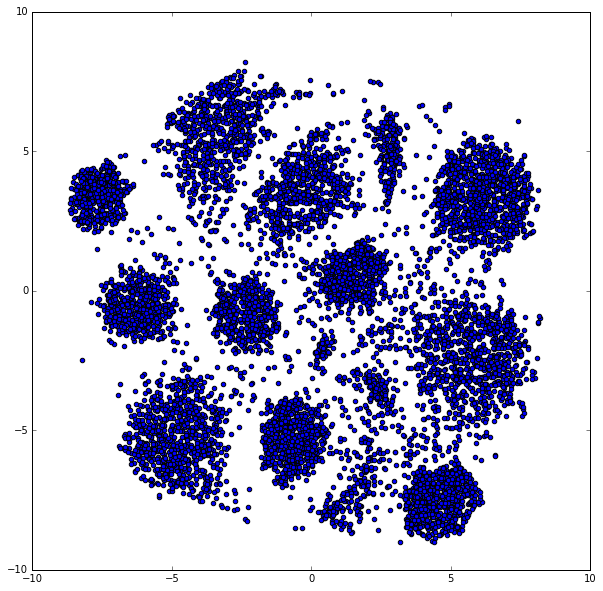

In [19]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1, 1, 1)
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

### Visualize with rollover

In [20]:
output_notebook()

Loading BokehJS ...

In [21]:
df = pd.DataFrame()
df['url'] = names
df['x'] = reduced_vectors[:,0]
df['y'] = reduced_vectors[:,1]
cds = ColumnDataSource(df)

In [22]:
hover = HoverTool(
        tooltips=[
            ("(x,y)", "($x, $y)"),
            ("url", "@url"),
        ]
    )

tools= [hover, 'resize','crosshair','pan','wheel_zoom','box_zoom','reset','tap','previewsave','box_select','poly_select','lasso_select']
radii = .1
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(np.floor(100+10*reduced_vectors[:,0]), np.floor(100+10*reduced_vectors[:,1]))]

p = figure(tools=tools)
p.scatter('x','y', source=cds, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

In [23]:
show(p)